In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  accuracy_score, classification_report, plot_confusion_matrix, confusion_matrix

RS = 47

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('csgo_round_snapshots.csv')
all_features = df.columns.to_list()

print(f'shape = {df.shape}')
print(f'Count of NaN = {df.isnull().sum().sum()}')
print(f'columns: {all_features}')

shape = (122410, 97)
Count of NaN = 0
columns: ['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive', 'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug', 'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon', 'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite', 't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas', 'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar', 't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock', 'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s', 'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10', 'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd', 'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9', 'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova', 'ct_weapon_p90

In [3]:
df.head(5)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

# Preprocessing

In [5]:
df.columns[df.nunique() == 1]

Index(['ct_weapon_bizon', 'ct_weapon_g3sg1', 't_weapon_m249',
       'ct_weapon_negev', 'ct_weapon_r8revolver', 'ct_weapon_sawedoff'],
      dtype='object')

In [6]:
df.drop(df.columns[df.nunique() == 1], inplace=True, axis=1)

In [7]:
df['map'].unique()

array(['de_dust2', 'de_mirage', 'de_nuke', 'de_inferno', 'de_overpass',
       'de_vertigo', 'de_train', 'de_cache'], dtype=object)

In [8]:
df['round_winner'].unique()

array(['CT', 'T'], dtype=object)

In [9]:
df['bomb_planted'] = df['bomb_planted'].astype(int)

In [10]:
df_old = df[['map', 'round_winner']].copy()

label_encoder = LabelEncoder()

In [11]:
df['map'] = label_encoder.fit_transform(df['map'])

map_to_classes = {idx: label for idx, label in enumerate(label_encoder.classes_)}
map_to_classes

{0: 'de_cache',
 1: 'de_dust2',
 2: 'de_inferno',
 3: 'de_mirage',
 4: 'de_nuke',
 5: 'de_overpass',
 6: 'de_train',
 7: 'de_vertigo'}

In [12]:
df['round_winner'] = label_encoder.fit_transform(df['round_winner'])

round_winner_to_classes = {idx: label for idx, label in enumerate(label_encoder.classes_)}
round_winner_to_classes

{0: 'CT', 1: 'T'}

In [13]:
df[['map', 'round_winner', 'bomb_planted']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   map           122410 non-null  int64
 1   round_winner  122410 non-null  int64
 2   bomb_planted  122410 non-null  int64
dtypes: int64(3)
memory usage: 2.8 MB


In [14]:
selected_cols = all_features[:5] + random.choices(all_features[5:-1], k=4) + [all_features[-1]]
selected_cols

['time_left',
 'ct_score',
 't_score',
 'map',
 'bomb_planted',
 'ct_weapon_mag7',
 't_money',
 'ct_weapon_nova',
 'ct_weapon_mac10',
 'round_winner']

In [15]:
correlation = df[selected_cols].corr(numeric_only=True)
correlation.shape

(10, 10)

Text(0.5, 1.0, 'Correlation Heatmap')

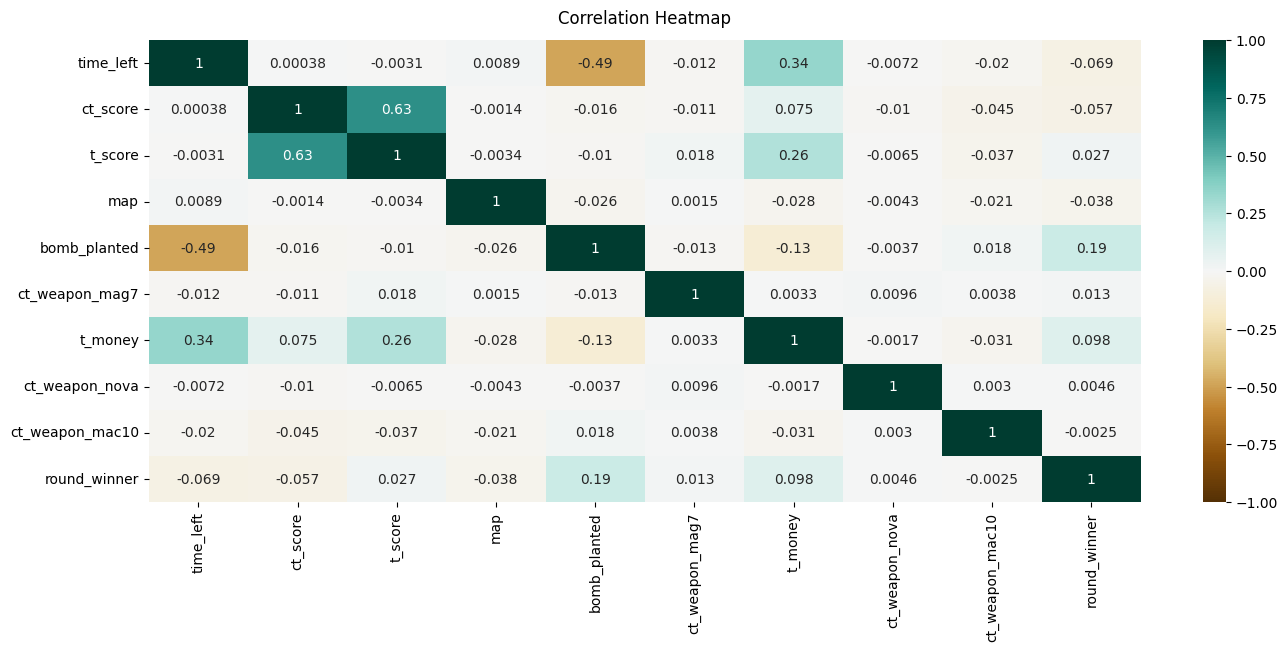

In [16]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, cmap='BrBG', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Correlation Heatmap')

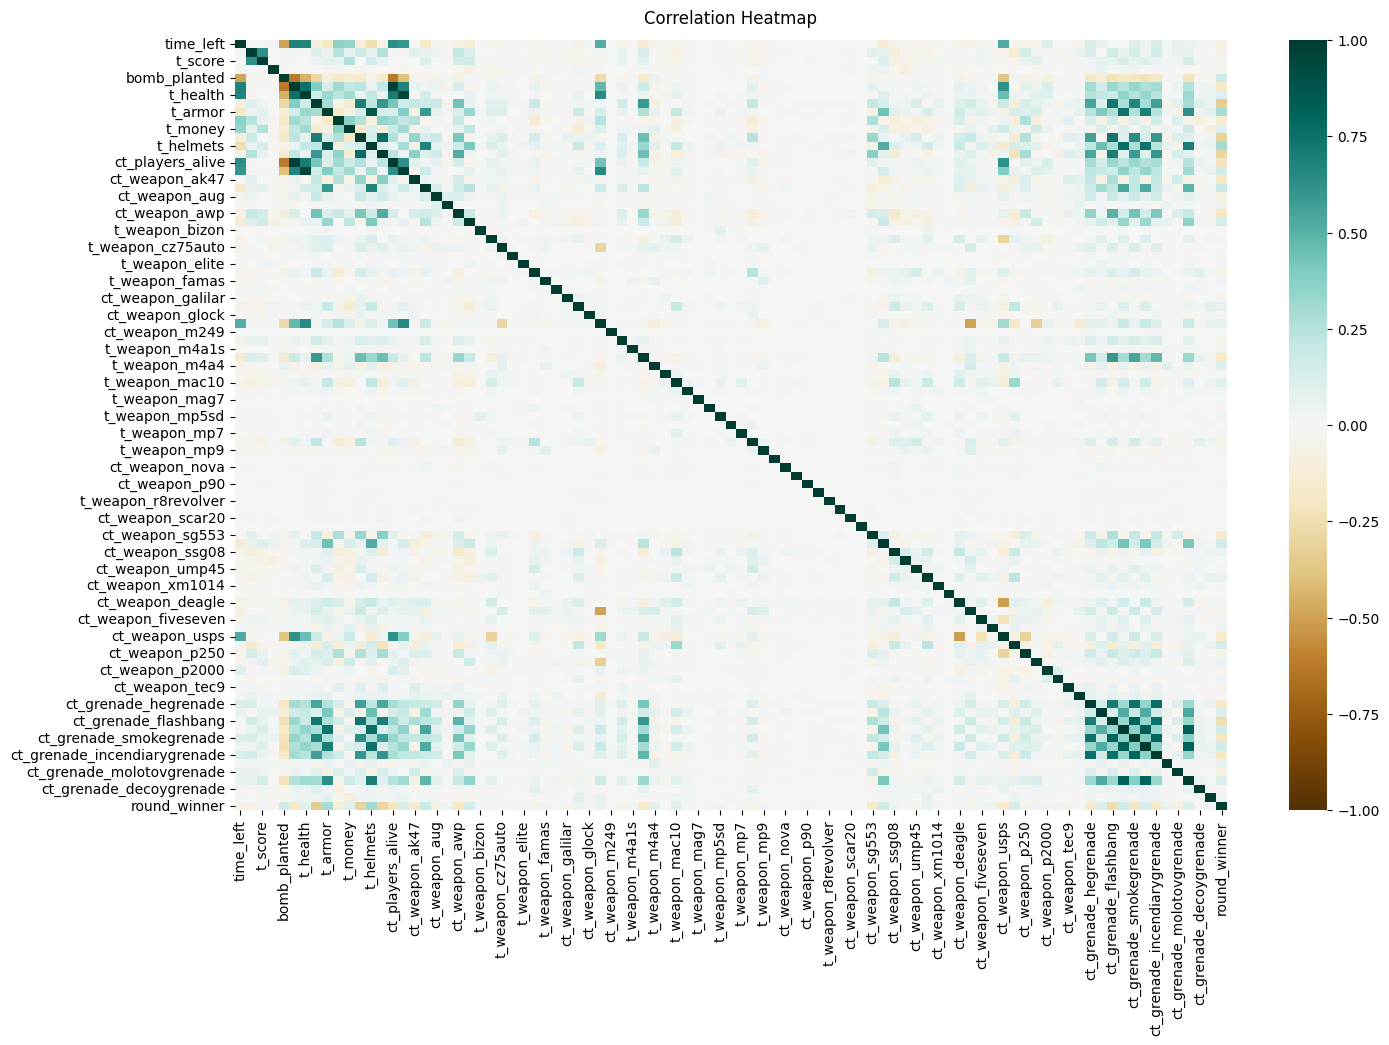

In [17]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

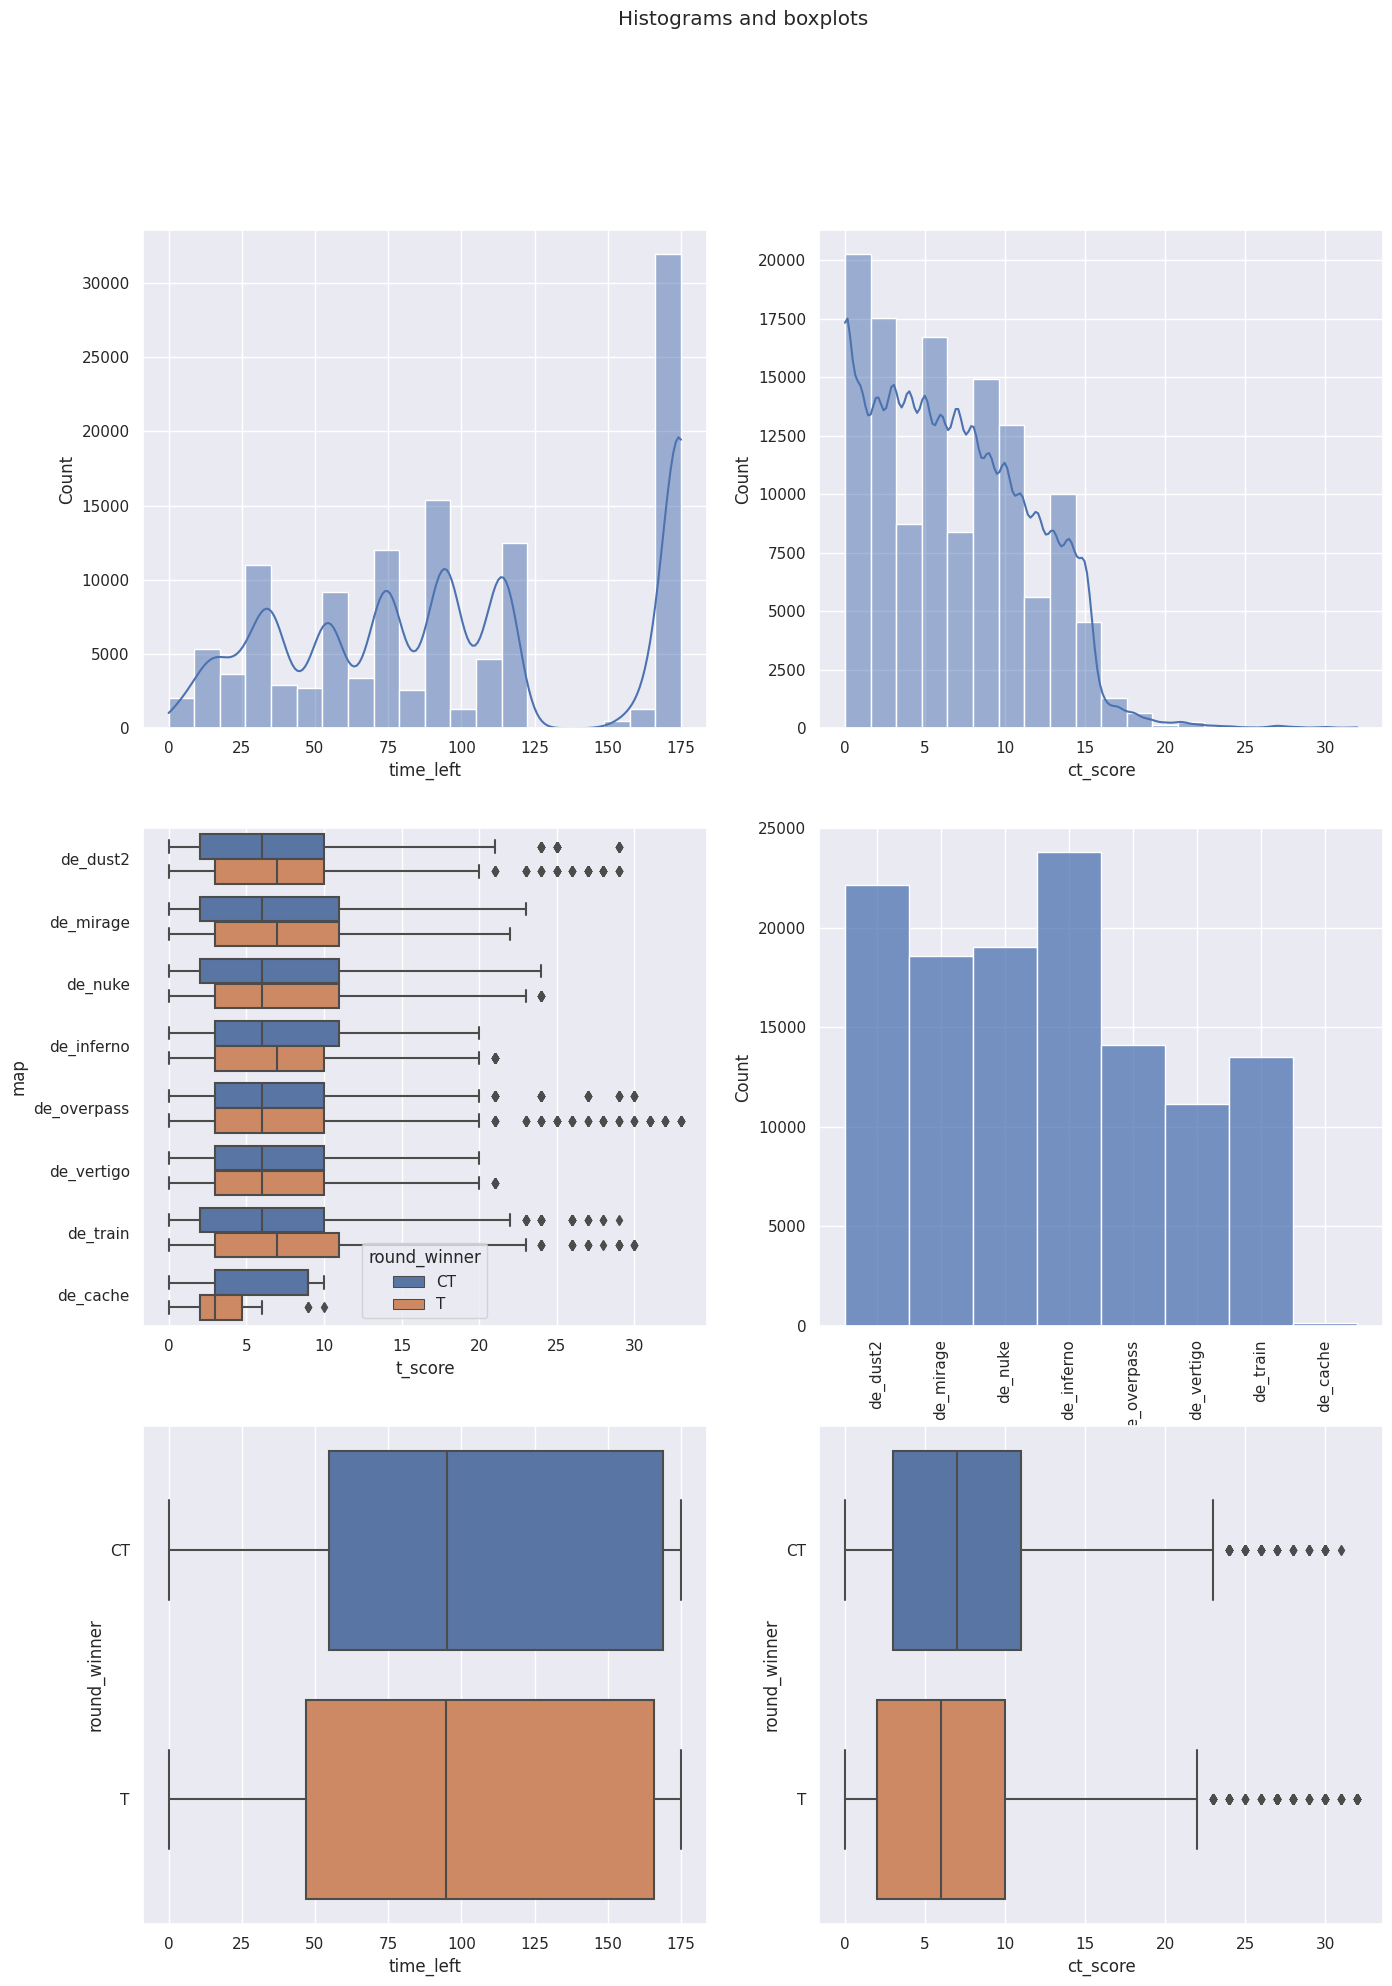

In [18]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(3, 2, sharex=False, figsize=(16,22))
fig.suptitle('Histograms and boxplots')

sns.histplot(ax=axes[0, 0], data=df[selected_cols[0]], kde=True, bins=20)
sns.histplot(ax=axes[0, 1], data=df[selected_cols[1]], kde=True, bins=20)
sns.histplot(ax=axes[1, 1], data=df_old['map'], bins=8)
sns.boxplot(ax=axes[2, 0], x=df[selected_cols[0]], y=df_old["round_winner"], )
sns.boxplot(ax=axes[2, 1], x=df[selected_cols[1]], y=df_old["round_winner"], )
sns.boxplot(ax=axes[1, 0], x=df['t_score'], y=df_old["map"], hue=df_old['round_winner'])

#axes[0].set_title('Title of test')
#axes[0, 1].set_ylabel(None)
#tick_params(axis ='x', rotation = 45)
axes[1, 1].tick_params(axis='x', rotation=90)
#axes[0, 2].set_ylabel(None)
#axes[2, 1].set_ylabel(None)

In [19]:
scaler = StandardScaler()

In [20]:
y = df['round_winner']

df.drop('round_winner', axis=1, inplace=True)
X = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [21]:
X

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1.415828,-1.400576,-1.405702,-1.306410,-0.354764,0.664386,0.695301,-1.836777,-1.709542,-0.516186,...,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
1,1.067531,-1.400576,-1.405702,-1.306410,-0.354764,0.664386,0.695301,0.502008,0.008909,-0.819351,...,-1.045338,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
2,-0.034094,-1.400576,-1.405702,-1.306410,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,...,-1.045338,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
3,-0.401302,-1.400576,-1.405702,-1.306410,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,...,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
4,1.415277,-1.191823,-1.405702,-1.306410,-0.354764,0.664386,0.695301,-0.714160,-1.709542,0.763351,...,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,-1.514310,0.895711,1.496741,1.285498,2.818773,-1.603312,-1.148630,-0.696619,0.346871,-0.863935,...,-0.481253,0.079077,-0.311206,-0.342864,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
122406,1.414542,0.895711,1.704058,1.285498,-0.354764,0.664386,0.695301,-1.281315,-0.707112,0.152561,...,-0.481253,0.079077,-0.311206,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
122407,0.312918,0.895711,1.704058,1.285498,-0.354764,0.664386,0.695301,1.057469,1.011339,-0.765852,...,1.211001,1.193615,0.839676,1.843956,-0.001350,-0.137694,-0.210881,2.193253,-0.163356,-0.156855
122408,-0.054290,0.895711,1.704058,1.285498,-0.354764,0.664386,0.695301,1.057469,1.011339,-0.765852,...,-0.481253,1.750884,-0.886648,0.750546,-0.687185,-0.137694,-0.210881,1.592017,-0.163356,-0.156855


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=RS)

In [23]:
print(f'X_train={X_train.shape}, y_train={y_train.shape}\nX_test={X_test.shape}, y_test={y_test.shape}')

X_train=(97928, 90), y_train=(97928,)
X_test=(24482, 90), y_test=(24482,)


# DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
param_grid = {
    'criterion': ['gini','entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(range(20, 70, 10)), 
    'min_samples_leaf' : list(range(1, 3))
}

Optimizer = GridSearchCV(
    DecisionTreeClassifier(random_state=RS), param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1
)

In [89]:
Optimizer.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=47), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 20, 30, 40, 50, 60],
                         'min_samples_leaf': [1, 2],
                         'splitter': ['best', 'random']},
             scoring='f1', verbose=1)

In [90]:
Optimizer.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 47,
 'splitter': 'best'}

In [91]:
Optimizer.score(X_test, y_test)

0.8314389359129384

In [92]:
predict_DTcls = Optimizer.predict(X_test)
print(classification_report(y_test, predict_DTcls))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     12115
           1       0.83      0.83      0.83     12367

    accuracy                           0.83     24482
   macro avg       0.83      0.83      0.83     24482
weighted avg       0.83      0.83      0.83     24482



/home/henitsoi/kpi/data_analysis/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


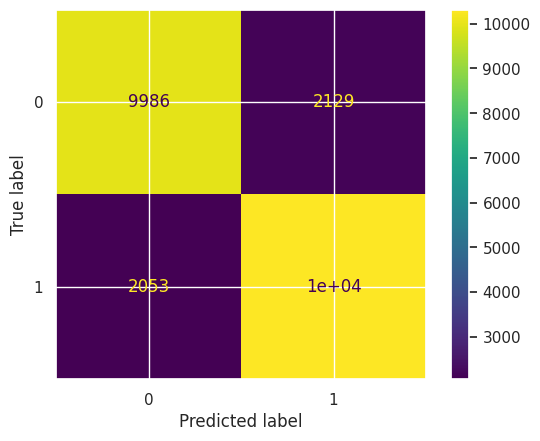

In [93]:
plot_confusion_matrix(Optimizer, X_test, y_test)

In [94]:
confusion_matrix(y_test, predict_DTcls)

array([[ 9986,  2129],
       [ 2053, 10314]])

# RandomForestClassifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
param_grid = {
    'n_estimators': list(range(600, 1200, 200)),
    'max_depth': [None] + list(range(30, 50, 10)),
#     'max_features': ['sqrt', 2],
#     'min_samples_leaf': list(range(1, 4)),
#     'min_samples_split': list(range(2, 6, 2))
}

Optimizer = GridSearchCV(
    RandomForestClassifier(random_state=RS), param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1
)

In [97]:
Optimizer.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/henitsoi/kpi/data_analysis/venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=47), n_jobs=-1,
             param_grid={'max_depth': [None, 30, 40],
                         'n_estimators': [600, 800, 1000]},
             scoring='f1', verbose=1)

In [98]:
Optimizer.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 47,
 'verbose': 0,
 'warm_start': False}

In [99]:
Optimizer.score(X_test, y_test)

0.8826440872090644

In [100]:
predict_RFcls = Optimizer.predict(X_test)
print(classification_report(y_test, predict_RFcls))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     12115
           1       0.89      0.87      0.88     12367

    accuracy                           0.88     24482
   macro avg       0.88      0.88      0.88     24482
weighted avg       0.88      0.88      0.88     24482



/home/henitsoi/kpi/data_analysis/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


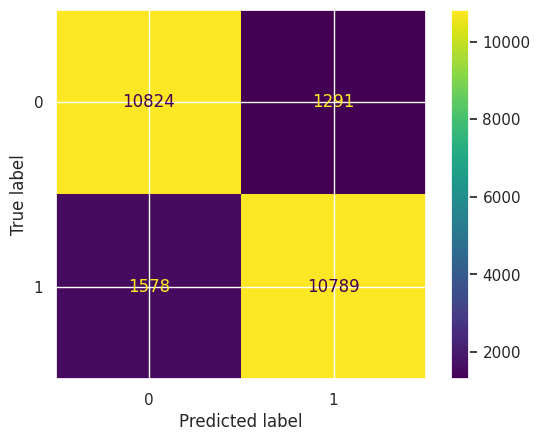

In [101]:
plot_confusion_matrix(Optimizer, X_test, y_test)

In [102]:
confusion_matrix(y_test, predict_RFcls)

array([[10824,  1291],
       [ 1578, 10789]])

# KNeighborsClassifier

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
param_grid = {
    'n_neighbors': list(range(2, 10, 2)),
    'p': [1, 2]
}

Optimizer = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)

In [105]:
Optimizer.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 4, 6, 8], 'p': [1, 2]},
             scoring='f1', verbose=1)

In [106]:
Optimizer.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 1,
 'weights': 'uniform'}

In [107]:
Optimizer.score(X_test, y_test)

0.867527917670243

In [108]:
predict_KNNcls = Optimizer.predict(X_test)
print(classification_report(y_test, predict_KNNcls))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     12115
           1       0.95      0.80      0.87     12367

    accuracy                           0.88     24482
   macro avg       0.89      0.88      0.88     24482
weighted avg       0.89      0.88      0.88     24482



/home/henitsoi/kpi/data_analysis/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


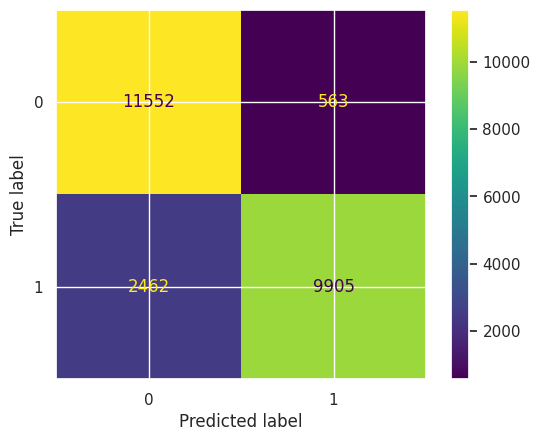

In [109]:
plot_confusion_matrix(Optimizer, X_test, y_test)

In [110]:
confusion_matrix(y_test, predict_KNNcls)

array([[11552,   563],
       [ 2462,  9905]])

# SVC

In [24]:
from sklearn.svm import SVC

In [31]:
param_grid = {
    'kernel': ['rbf'],
    'C': [1, 5, 10],
    'gamma': ['scale', 0.01, 0.05]
}

Optimizer = GridSearchCV(SVC(random_state=RS), param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)

In [32]:
Optimizer.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=28.1min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=29.0min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=29.1min
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=29.2min
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=30.6min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=31.1min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=33.0min
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=33.4min
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=34.8min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=34.9min
[CV] END ........................C=5, gamma=0.01, kernel=rbf; total time=35.6min
[CV] END ........................C=5, gamma=0.01,

GridSearchCV(cv=5, estimator=SVC(random_state=47), n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'gamma': ['scale', 0.01, 0.05],
                         'kernel': ['rbf']},
             scoring='f1', verbose=2)

In [33]:
Optimizer.best_estimator_.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.05,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 47,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [34]:
Optimizer.score(X_test, y_test)

0.8849657396211204

In [35]:
predict_SVcls = Optimizer.predict(X_test)
print(classification_report(y_test, predict_SVcls))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12115
           1       0.88      0.89      0.88     12367

    accuracy                           0.88     24482
   macro avg       0.88      0.88      0.88     24482
weighted avg       0.88      0.88      0.88     24482



/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


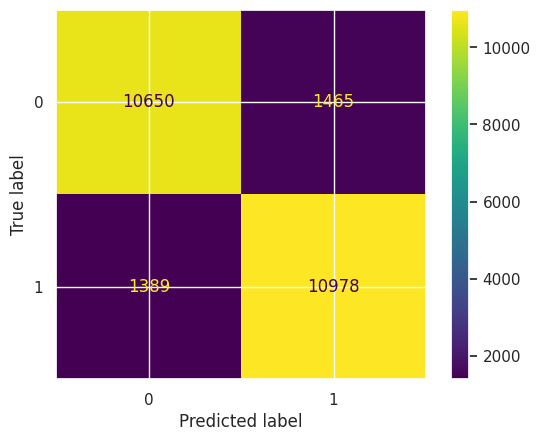

In [36]:
plot_confusion_matrix(Optimizer, X_test, y_test)

In [37]:
confusion_matrix(y_test, predict_SVcls)

array([[10650,  1465],
       [ 1389, 10978]])

# AdaBoostClassifier

In [34]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
param_grid = {
    "base_estimator__max_depth" : [None, 1],
    'n_estimators': [20, 50, 100, 150, 250, 500],
    'learning_rate': [0.5, 1, 2]
}

Optimizer = GridSearchCV(
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=RS), 
    param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1
)

In [40]:
Optimizer.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          random_state=47),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [None, 1],
                         'learning_rate': [0.5, 1, 2],
                         'n_estimators': [20, 50, 100, 150, 250, 500]},
             scoring='f1', verbose=1)

In [41]:
Optimizer.best_estimator_.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(),
 'learning_rate': 0.5,
 'n_estimators': 500,
 'random_state': 47}

In [42]:
Optimizer.score(X_test, y_test)

0.8889431092676182

In [43]:
predict_ABcls = Optimizer.predict(X_test)
print(classification_report(y_test, predict_ABcls))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     12115
           1       0.89      0.88      0.89     12367

    accuracy                           0.89     24482
   macro avg       0.89      0.89      0.89     24482
weighted avg       0.89      0.89      0.89     24482



/home/henitsoi/kpi/data_analysis/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


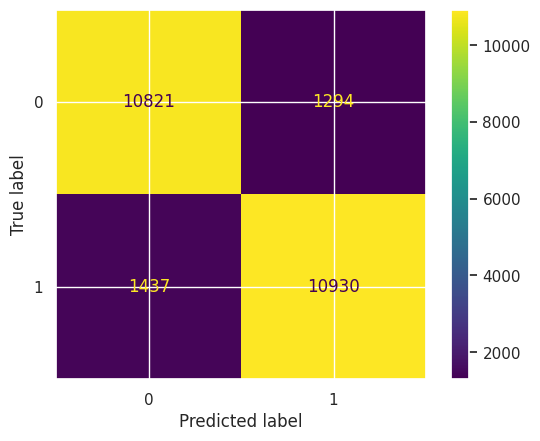

In [44]:
plot_confusion_matrix(Optimizer, X_test, y_test)

In [45]:
confusion_matrix(y_test, predict_ABcls)

array([[10821,  1294],
       [ 1437, 10930]])